<a href="https://colab.research.google.com/github/echoheqian/drug-target-master/blob/main/dbgap_sleep_cvds_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A complete ML Pipeline Tutorial 

## 1. import packages needed for ML

In [4]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

## set a seed for code reproducibility 

In [5]:
SEED = 7
np.random.seed(SEED)

## 2. Data preparing

### Loading data

In [ ]:
df = (pd.read_csv('diabetes.csv', sep=","))
# getting dataframe columns names
df_name = df.columns
df.head()

In [10]:
## 2023-03-26 try my own dataset
cols = ['age','PC1','PC2','PC3','PC4','PC5','dm_trial',
        'baseline_sleepdis',
        'delta_sleep',
        'SCORE_baseline_sleep_p0.05_0.05',
        'mi']
df = (pd.read_csv('pheno.prs.0318.csv', sep="\t")
        .filter(cols)
        .query('dm_trial==True')
        .drop('dm_trial', axis=1))
df.shape

(5843, 10)

In [11]:
df_name = df.columns
df_name

Index(['age', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'baseline_sleepdis',
       'delta_sleep', 'SCORE_baseline_sleep_p0.05_0.05', 'mi'],
      dtype='object')

### 2.1 Analyze Data
#### 2.1.1 Descriptive statistics

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5843 entries, 1 to 16595
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              5843 non-null   int64  
 1   PC1                              5843 non-null   float64
 2   PC2                              5843 non-null   float64
 3   PC3                              5843 non-null   float64
 4   PC4                              5843 non-null   float64
 5   PC5                              5843 non-null   float64
 6   baseline_sleepdis                5735 non-null   float64
 7   delta_sleep                      4648 non-null   float64
 8   SCORE_baseline_sleep_p0.05_0.05  5843 non-null   float64
 9   mi                               5843 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 502.1 KB


In [13]:
df.head()

,age,PC1,PC2,PC3,PC4,PC5,baseline_sleepdis,delta_sleep,SCORE_baseline_sleep_p0.05_0.05,mi
1,51,19.3170,-6.01057,-0.847162,-3.088190,-1.616260,7.0,-4.0,557.363,0
2,70,18.4899,-2.55996,-2.733350,-0.762424,-2.352900,5.0,-1.0,545.961,0
5,54,21.1279,-2.20355,-5.271890,1.197430,-1.984130,0.0,8.0,559.216,0
10,64,18.5610,-4.93358,-1.291200,-1.241240,-2.034330,1.0,0.0,546.154,0
17,62,21.5922,-2.68457,0.100567,-0.723327,0.272089,6.0,-2.0,542.074,0


In [14]:
df.describe()

,age,PC1,PC2,PC3,PC4,PC5,baseline_sleepdis,delta_sleep,SCORE_baseline_sleep_p0.05_0.05,mi
count,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5735.000000,4648.000000,5843.000000,5843.000000
mean,65.364710,18.761417,-3.632157,-0.387671,0.251520,0.186243,6.745946,0.632530,549.691532,0.067773
std,6.729729,1.802595,2.097102,4.685318,1.830112,2.789271,4.362235,4.409977,11.014710,0.251378
min,50.000000,-0.164284,-9.148060,-8.134880,-7.359330,-10.855500,0.000000,-16.000000,504.332000,0.000000
25%,61.000000,17.866300,-4.756270,-2.786950,-0.828518,-1.641805,3.000000,-2.000000,544.471000,0.000000
50%,66.000000,18.949600,-3.740930,-1.442960,0.244840,-0.160277,6.000000,1.000000,550.666000,0.000000
75%,70.000000,19.910350,-2.691430,0.085803,1.270250,1.575680,9.000000,3.000000,556.633000,0.000000
max,79.000000,24.555300,40.386400,24.834400,47.883300,13.611300,20.000000,20.000000,621.942000,1.000000


In [15]:
df.isna().sum()

age                                   0
PC1                                   0
PC2                                   0
PC3                                   0
PC4                                   0
PC5                                   0
baseline_sleepdis                   108
delta_sleep                        1195
SCORE_baseline_sleep_p0.05_0.05       0
mi                                    0
dtype: int64

### 2.2 Data visualization
####### let's look at our data in the most raw shape by using scatter plot

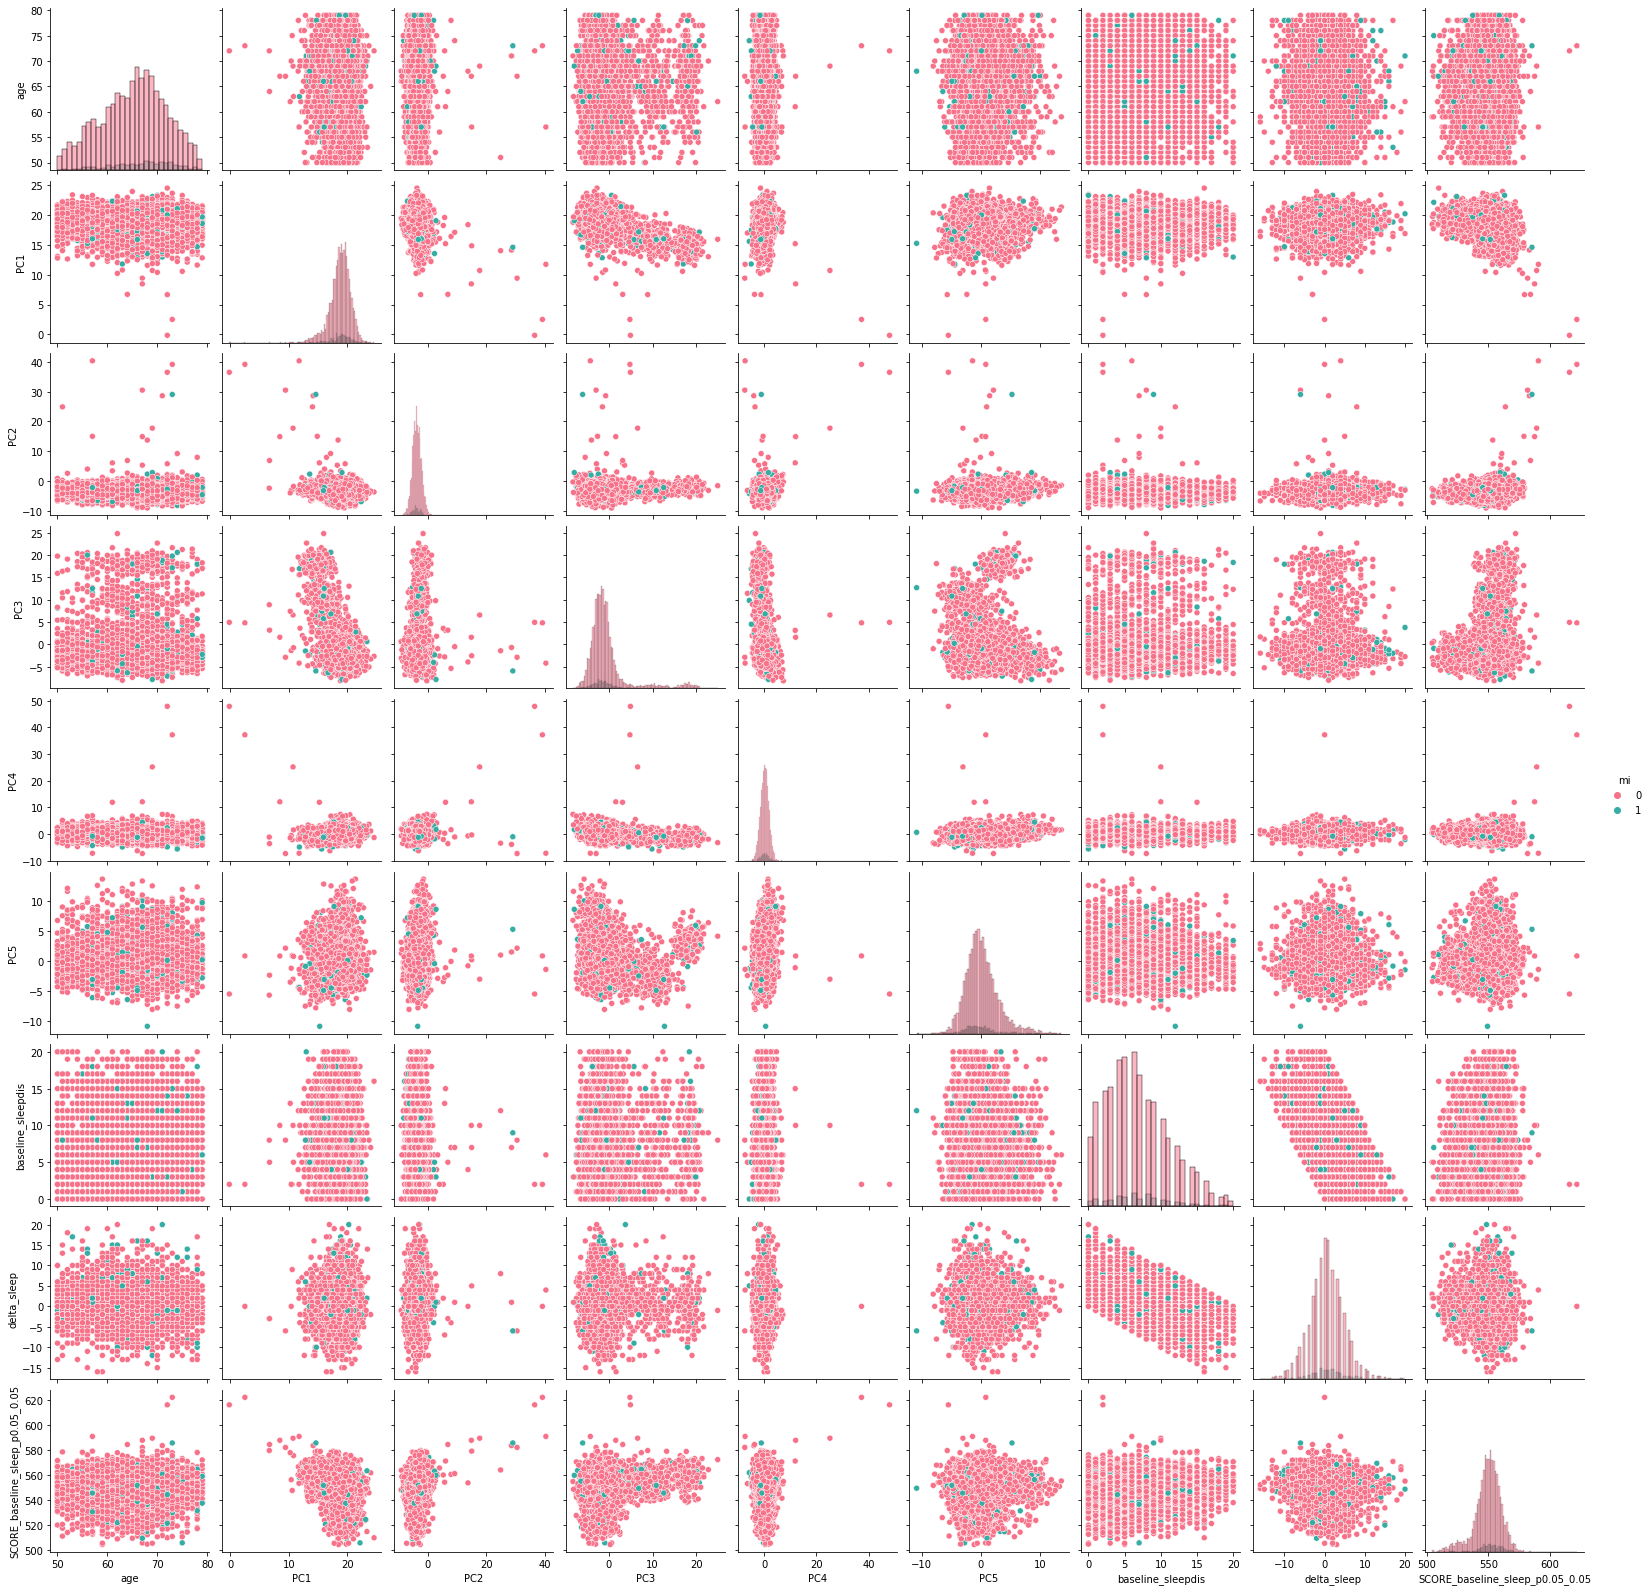

In [16]:
g = sns.pairplot(df, hue = "mi", diag_kind="hist", palette = "husl")

### check the example pregenecy distribution

In [17]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = .5

    trace1 = go.Histogram(
        x=data_array,
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min()-1,
            end=df[nameOfFeature].max()+1,
            size=binsize
        )
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

In [ ]:
plotHist(df,'age')

### Investagate each feature distribution for each outcome

In [19]:
from scipy.stats import skew
from scipy.stats import kurtosis
## define bar plot
def plotBarCat(df,feature,target):




    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
## define Describe float skewkurt
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,target)

In [ ]:
plotBarCat(df,df_name[0],'mi')

In [ ]:
plotBarCat(df,df_name[1],'mi')

In [ ]:
plotBarCat(df,df_name[2],'mi')

In [ ]:
plotBarCat(df,df_name[3],'mi')

In [ ]:
plotBarCat(df,df_name[4],'mi')

In [ ]:
plotBarCat(df,df_name[5],'mi')

In [ ]:
plotBarCat(df,df_name[6],'mi')

In [ ]:
plotBarCat(df,df_name[7],'mi')

In [ ]:
plotBarCat(df,df_name[8],'mi')

### pie plot to check the proportion of outcome

In [20]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])

In [ ]:
PlotPie(df, 'mi')

## 2.3.1 Outlier investigation

In [21]:
def OutLiersBox(df, nameOfFeature):
  trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

  trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

  trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

  trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

  data = [trace0,trace1,trace2,trace3]

  layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

  fig = go.Figure(data=data,layout=layout)
  py.iplot(fig, filename = "Outliers")

In [ ]:
OutLiersBox(df,df_name[0])

In [ ]:
OutLiersBox(df,df_name[1])

In [ ]:
OutLiersBox(df,df_name[2])

In [ ]:
OutLiersBox(df,df_name[3])

In [ ]:
OutLiersBox(df,df_name[4])

In [ ]:
OutLiersBox(df,df_name[5])

In [ ]:
OutLiersBox(df,df_name[6])

In [ ]:
OutLiersBox(df,df_name[7])

In [ ]:
OutLiersBox(df,df_name[8])

## 2.3.2 Outliers investigation pairs

In [22]:
df.shape[0]

5843

In [23]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define outlier detection methods

def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    # 设置随机数字
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    # 采用四种方法检测异常值
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            novelty=True,
            contamination=outliers_fraction)}

    # meshgrid 函数用两个坐标轴上的点在平面上画网格
    # linspace 用来创建等差数列
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))

    # 计算在正常值范围内 inliers 和异常值 outliers 的 sample 数量
    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    # np.ones()函数返回给定形状和数据类型的新数组
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    # enumerate 迭代对象
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation
    # value.tolist将data_frame 转换为 list形式
        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit(X).predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
              # .decision_function 为机器学习框架的分类器类,计算样本点到分割超平面的函数距离
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
              # .reshape可转变数组的形状，转为二维或者三维数组
            Z = Z.reshape(xx.shape)
            # subplot 可绘制多图
            subplot = plt.subplot(2, 2, i + 1)
            # countour & countourf 为生成等线图
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            # plt.cm.Blues_r为python内置颜色映射
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
            # %s 运算符放在要指定字符串的位置。要附加到字符串的值的数量应等于字符串值末尾 % 运算符后括号中指定的数量
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
            # %d 运算符放在要指定整数的位置。浮点数会自动转换为十进制值。
        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

One-Class SVM {-1: 848, 1: 4995}
Robust covariance {-1: 585, 1: 5258}
Isolation Forest {-1: 585, 1: 5258}
Local Outlier Factor {-1: 509, 1: 5334}


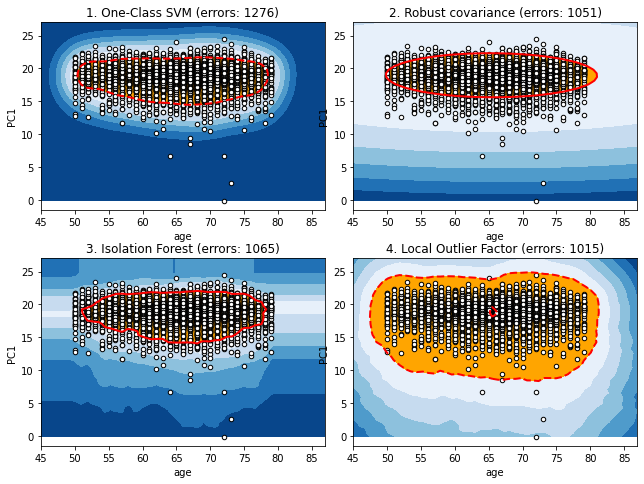

In [24]:
tt = OutLierDetection(df,'age','PC1',.1)

## 3.1 Evaluate Algorithms: Baseline

In [25]:
# Load libraries
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### make train-validation and test data sets

In [26]:
df.dropna(subset=['baseline_sleepdis','delta_sleep','mi'], inplace=True)
df['mi'].value_counts()

0    4335
1     313
Name: mi, dtype: int64

In [27]:
df.isna().sum()

age                                0
PC1                                0
PC2                                0
PC3                                0
PC4                                0
PC5                                0
baseline_sleepdis                  0
delta_sleep                        0
SCORE_baseline_sleep_p0.05_0.05    0
mi                                 0
dtype: int64

In [28]:
X = df[df_name[0:9]]
Y = df[df_name[9]]
X_train, X_test, y_train, y_test = train_test_split(
    X,Y,
    test_size=0.25,
    random_state=0,
    stratify=Y
)
# train 和 test 分布不平衡的情况会 用到stratify参数，按照x 或者 y 调整平衡分布
# 将stratify=X就是按照X中的比例分配 
# 将stratify=y就是按照y中的比例分配

In [29]:
sum(y_train == 1)
print("There are {} training samples".format(y_train.shape[0]))
print("There are {} testing samples".format(X_test.shape[0]))

There are 3486 training samples
There are 1162 testing samples


In [30]:
X.head(10)

,age,PC1,PC2,PC3,PC4,PC5,baseline_sleepdis,delta_sleep,SCORE_baseline_sleep_p0.05_0.05
1,51,19.3170,-6.01057,-0.847162,-3.088190,-1.616260,7.0,-4.0,557.363
2,70,18.4899,-2.55996,-2.733350,-0.762424,-2.352900,5.0,-1.0,545.961
5,54,21.1279,-2.20355,-5.271890,1.197430,-1.984130,0.0,8.0,559.216
10,64,18.5610,-4.93358,-1.291200,-1.241240,-2.034330,1.0,0.0,546.154
17,62,21.5922,-2.68457,0.100567,-0.723327,0.272089,6.0,-2.0,542.074
20,64,20.2736,-4.16580,2.717630,-1.332740,-0.169011,10.0,-4.0,551.879
21,60,18.7016,-5.11343,-3.686450,0.799760,-0.435579,4.0,8.0,560.769
25,71,17.9496,-5.13878,-0.553370,0.494303,2.114790,10.0,4.0,555.226
28,60,17.0905,-2.63943,0.930068,-1.316060,-0.604022,7.0,2.0,558.184
30,70,21.3331,-2.05720,-3.987320,2.506670,1.146190,19.0,-6.0,548.637


In [31]:
Y.head(10)

1     0
2     0
5     0
10    0
17    0
20    0
21    0
25    0
28    0
30    0
Name: mi, dtype: int64

In [32]:
df.head(10)

,age,PC1,PC2,PC3,PC4,PC5,baseline_sleepdis,delta_sleep,SCORE_baseline_sleep_p0.05_0.05,mi
1,51,19.3170,-6.01057,-0.847162,-3.088190,-1.616260,7.0,-4.0,557.363,0
2,70,18.4899,-2.55996,-2.733350,-0.762424,-2.352900,5.0,-1.0,545.961,0
5,54,21.1279,-2.20355,-5.271890,1.197430,-1.984130,0.0,8.0,559.216,0
10,64,18.5610,-4.93358,-1.291200,-1.241240,-2.034330,1.0,0.0,546.154,0
17,62,21.5922,-2.68457,0.100567,-0.723327,0.272089,6.0,-2.0,542.074,0
20,64,20.2736,-4.16580,2.717630,-1.332740,-0.169011,10.0,-4.0,551.879,0
21,60,18.7016,-5.11343,-3.686450,0.799760,-0.435579,4.0,8.0,560.769,0
25,71,17.9496,-5.13878,-0.553370,0.494303,2.114790,10.0,4.0,555.226,0
28,60,17.0905,-2.63943,0.930068,-1.316060,-0.604022,7.0,2.0,558.184,0
30,70,21.3331,-2.05720,-3.987320,2.506670,1.146190,19.0,-6.0,548.637,0


### spot-check algorithms

In [33]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [34]:
def BasedLine2(X_train, y_train, models):
  # Test options and evaluation metric
  num_folds = 10
  scoring = "accuracy"
  results = []
  names = []
  # StratifiedKFold 保证训练集中每一类的比例是相同的,其中参数含义：n_splits为折叠次数,shuffle: 是否在每次分割之前打乱顺序
  # cross_val_score 为交叉验证函数，其中参数含义，cv为每次选择验证折数 
  for name, model in models:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
  return names, results

In [35]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [36]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train, models)
# 箱式图 为 d最小值、第一四分位数、中位数、第三四分位数和最大值
PlotBoxR().PlotResult(names, results)

LR: 0.932589 (0.001358)
LDA: 0.932589 (0.001358)
KNN: 0.930582 (0.002756)
CART: 0.854567 (0.009603)
NB: 0.932302 (0.002578)
SVM: 0.932589 (0.001358)
AB: 0.931729 (0.002090)
GBM: 0.929146 (0.003832)
RF: 0.932016 (0.002521)
ET: 0.932302 (0.001833)


### define dataframe genetating calculator

In [37]:
def ScoreDataFrame(names, results):
  def floatingDecimals(f_val, dec=3):
    prc = "{:." + str(dec)+"f}"
    return float(prc.format(f_val))
  scores = []
  for r in results:
    scores.append(floatingDecimals(r.mean(),4))
  scoreDataFrame = pd.DataFrame({'Model':names, 'Score':scores})
  return scoreDataFrame

In [38]:
basedLineScore = ScoreDataFrame(names, results)
basedLineScore

,Model,Score
0,LR,0.9326
1,LDA,0.9326
2,KNN,0.9306
3,CART,0.8546
4,NB,0.9323
5,SVM,0.9326
6,AB,0.9317
7,GBM,0.9291
8,RF,0.9320
9,ET,0.9323


# Feature Engineering

## 4.1 Data Preprocessing

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# .append() 将任何对象添加到给定列表
def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

### 有时scaling 也可提高 tree based model 的预测准确性

## 4.1.2 standard 标准化 Scaling method

In [40]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train, models)
PlotBoxR().PlotResult(names, results)
scaledScoreStandard = ScoreDataFrame(names, results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.932589 (0.001358)
standardLDA: 0.932589 (0.001358)
standardKNN: 0.929719 (0.002317)
standardCART: 0.856575 (0.009513)
standardNB: 0.932302 (0.002578)
standardSVM: 0.932589 (0.001358)
standardAB: 0.931729 (0.002090)
standardGBM: 0.930295 (0.003352)
standardRF: 0.932302 (0.001833)
standardET: 0.932589 (0.001358)


,Model,Score,Model,Score
0,LR,0.9326,standardLR,0.9326
1,LDA,0.9326,standardLDA,0.9326
2,KNN,0.9306,standardKNN,0.9297
3,CART,0.8546,standardCART,0.8566
4,NB,0.9323,standardNB,0.9323
5,SVM,0.9326,standardSVM,0.9326
6,AB,0.9317,standardAB,0.9317
7,GBM,0.9291,standardGBM,0.9303
8,RF,0.9320,standardRF,0.9323
9,ET,0.9323,standardET,0.9326


### 4.1.2 MinMax

In [41]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train, models)
PlotBoxR().PlotResult(names, results)

scaledScoreMinMax = ScoreDataFrame(names, results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                           scaledScoreMinMax], axis = 1)
compareModels

minmaxLR: 0.932589 (0.001358)
minmaxLDA: 0.932589 (0.001358)
minmaxKNN: 0.929719 (0.002313)
minmaxCART: 0.856855 (0.008572)
minmaxNB: 0.932302 (0.002578)
minmaxSVM: 0.932589 (0.001358)
minmaxAB: 0.931729 (0.002090)
minmaxGBM: 0.929434 (0.004064)
minmaxRF: 0.932016 (0.002171)
minmaxET: 0.932589 (0.001358)


,Model,Score,Model,Score,Model,Score
0,LR,0.9326,standardLR,0.9326,minmaxLR,0.9326
1,LDA,0.9326,standardLDA,0.9326,minmaxLDA,0.9326
2,KNN,0.9306,standardKNN,0.9297,minmaxKNN,0.9297
3,CART,0.8546,standardCART,0.8566,minmaxCART,0.8569
4,NB,0.9323,standardNB,0.9323,minmaxNB,0.9323
5,SVM,0.9326,standardSVM,0.9326,minmaxSVM,0.9326
6,AB,0.9317,standardAB,0.9317,minmaxAB,0.9317
7,GBM,0.9291,standardGBM,0.9303,minmaxGBM,0.9294
8,RF,0.9320,standardRF,0.9323,minmaxRF,0.9320
9,ET,0.9323,standardET,0.9326,minmaxET,0.9326


## 4.2 Remove Outliers

### Let's remove outliers and see how it effects on the prediction

In [42]:
df_t = df.copy()
df_t_name = df_t.columns

In [43]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):
    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]
   
    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out


### Feature 0

In [ ]:
feature_number = 0
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_t, df_name[feature_number], True)
OutLiersBox(df_clean, df_name[feature_number])

### Feature 1

In [ ]:
feature_number = 1
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 2

In [ ]:
feature_number = 2
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 3

In [ ]:
feature_number = 3
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 4

In [ ]:
feature_number = 4
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[4],True)
OutLiersBox(df_clean,df_name[4])

### Feature 5

In [ ]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 6

In [ ]:
feature_number = 6
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 7

In [ ]:
feature_number = 7
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 8

In [ ]:
feature_number = 8
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Feature 9

In [ ]:
feature_number = 9
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

### Cleaning Report

In [46]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 4648, new df shape: 4648, we lost 0 rows, 0.0% of our data


In [47]:
df_clean['mi'].value_counts()

0    4335
1     313
Name: mi, dtype: int64

### double-check and compare the outliers between before and after removing the outliers

```
# This is formatted as code
```



In [ ]:
tt = OutLierDetection(df,'age','PC1',.1)

In [ ]:
tt_t = OutLierDetection(df_clean,'age','PC1',.1)

### Comparing the accuracy of models after cleaning

In [50]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:9]]
Y_c = df_clean[df_clean_name[9]]
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df_clean['mi'])

In [51]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

minmaxLR: 0.932589 (0.001358)
minmaxLDA: 0.932589 (0.001358)
minmaxKNN: 0.929719 (0.002313)
minmaxCART: 0.855422 (0.008717)
minmaxNB: 0.932302 (0.002578)
minmaxSVM: 0.932589 (0.001358)
minmaxAB: 0.931729 (0.002090)
minmaxGBM: 0.930294 (0.002840)
minmaxRF: 0.932016 (0.002171)
minmaxET: 0.932589 (0.001358)


,Model,Score,Model,Score,Model,Score,Model,Score
0,LR,0.9326,standardLR,0.9326,minmaxLR,0.9326,minmaxLR,0.9326
1,LDA,0.9326,standardLDA,0.9326,minmaxLDA,0.9326,minmaxLDA,0.9326
2,KNN,0.9306,standardKNN,0.9297,minmaxKNN,0.9297,minmaxKNN,0.9297
3,CART,0.8546,standardCART,0.8566,minmaxCART,0.8569,minmaxCART,0.8554
4,NB,0.9323,standardNB,0.9323,minmaxNB,0.9323,minmaxNB,0.9323
5,SVM,0.9326,standardSVM,0.9326,minmaxSVM,0.9326,minmaxSVM,0.9326
6,AB,0.9317,standardAB,0.9317,minmaxAB,0.9317,minmaxAB,0.9317
7,GBM,0.9291,standardGBM,0.9303,minmaxGBM,0.9294,minmaxGBM,0.9303
8,RF,0.9320,standardRF,0.9323,minmaxRF,0.9320,minmaxRF,0.9320
9,ET,0.9323,standardET,0.9326,minmaxET,0.9326,minmaxET,0.9326


## 4.3 Feature Selection

### 4.3.1 Corrolation
#### we have to drop the one that has more corrolation with other features

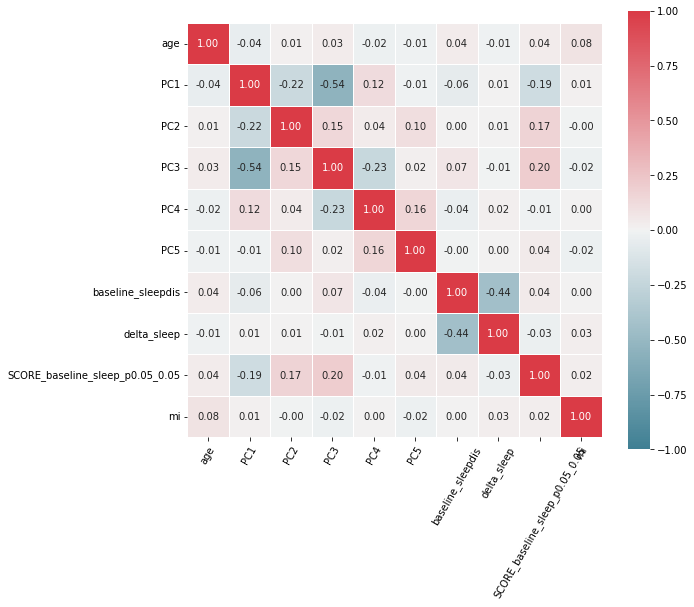

In [52]:
def HeatMap(df, x=True):
  correlations = df.corr()
  ## creat color map ranging between two colors
  ## diverging_palette()为创建两种颜色过渡色板
  cmap = sns.diverging_palette(220, 10,as_cmap=True)
  fig, ax = plt.subplots(figsize=(10,10))
  ## heatmap中参数: vmin和vmax定义图卡颜色，用于锚定颜色图的值
  # cmap 颜色映射名称或对象; fmt 添加注释时要使用的字符串格式化代码
  fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, vmin=-1.0,
                    fmt='.2f',square=True,linewidths=.5, 
                    annot=x, cbar_kws={'shrink': .75})
  fig.set_xticklabels(fig.get_xticklabels(), rotation = 60, fontsize = 10)
  fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
  plt.tight_layout()
  plt.show()

HeatMap(df,x=True)

### 4.3.2 Feature Importance

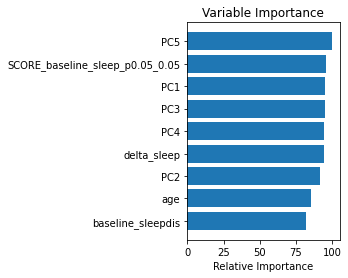

In [53]:
## ExtraTreesClassifier 它将森林中收集的多个去相关决策树的结果聚集起来输出分类结果
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### select important features

In [54]:
df_feature_imp=df_clean[['PC5','SCORE_baseline_sleep_p0.05_0.05','PC1','PC3','PC4','delta_sleep','PC2','age','mi']]

In [55]:
df_feature_imp_name = df_feature_imp.columns

In [56]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['mi'])

In [57]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

minmaxLR: 0.932585 (0.000900)
minmaxLDA: 0.932585 (0.000900)
minmaxKNN: 0.930672 (0.003536)
minmaxCART: 0.862059 (0.008106)
minmaxNB: 0.932585 (0.000900)
minmaxSVM: 0.932585 (0.000900)
minmaxAB: 0.931629 (0.001532)
minmaxGBM: 0.930911 (0.002903)
minmaxRF: 0.932346 (0.001058)
minmaxET: 0.932585 (0.000900)


,Model,Score,Model,Score,Model,Score,Model,Score,Model,Score
0,LR,0.9326,standardLR,0.9326,minmaxLR,0.9326,minmaxLR,0.9326,minmaxLR,0.9326
1,LDA,0.9326,standardLDA,0.9326,minmaxLDA,0.9326,minmaxLDA,0.9326,minmaxLDA,0.9326
2,KNN,0.9306,standardKNN,0.9297,minmaxKNN,0.9297,minmaxKNN,0.9297,minmaxKNN,0.9307
3,CART,0.8546,standardCART,0.8566,minmaxCART,0.8569,minmaxCART,0.8554,minmaxCART,0.8621
4,NB,0.9323,standardNB,0.9323,minmaxNB,0.9323,minmaxNB,0.9323,minmaxNB,0.9326
5,SVM,0.9326,standardSVM,0.9326,minmaxSVM,0.9326,minmaxSVM,0.9326,minmaxSVM,0.9326
6,AB,0.9317,standardAB,0.9317,minmaxAB,0.9317,minmaxAB,0.9317,minmaxAB,0.9316
7,GBM,0.9291,standardGBM,0.9303,minmaxGBM,0.9294,minmaxGBM,0.9303,minmaxGBM,0.9309
8,RF,0.9320,standardRF,0.9323,minmaxRF,0.9320,minmaxRF,0.9320,minmaxRF,0.9323
9,ET,0.9323,standardET,0.9326,minmaxET,0.9326,minmaxET,0.9326,minmaxET,0.9326


In [58]:
df_unscaled = df_clean[['PC5','SCORE_baseline_sleep_p0.05_0.05','PC1','PC3','PC4','delta_sleep','PC2','age','mi']]
df_imp_scaled_name = df_unscaled.columns

In [61]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:8]
Y =  df_imp_scaled[:,8]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,8])

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [63]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [64]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

### 5.1 Logistic Regression

In [65]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [66]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.932585 using {'C': 3.730229437354635, 'penalty': 'l2'}


In [67]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [68]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.9333333


### 5.2 knn

In [69]:
# n_neighbors: Number of neighbors to use by default for k_neighbors queries
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [70]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))

Best: 0.932824 using {'n_neighbors': 8}
prediction on test set is: 0.9333333


### 5.3 svc

In [71]:
# C: The Penalty parameter C of the error term.
# Kernel: Kernel type could be linear, poly, rbf or sigmoid.
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [72]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.932585 using {'C': 0.1, 'kernel': 'linear'}
prediction on test set is: 0.9333333


### 5.4 Decision Tree

In [73]:
# max_depth: Maximum depth of the tree (double).
# row_subsample: Proportion of observations to consider (double).
# max_features: Proportion of columns (features) to consider in each level (double).

from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [74]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [75]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

Best: 0.932585 using {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}
prediction on test set is: 0.9333333


### 5.5 AdaBoostClassifier

In [110]:
# learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
# n_estimators: Number of trees to build.
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [111]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))

Best: 0.800817 using {'learning_rate': 0.05, 'n_estimators': 150}
prediction on test set is: 0.8125


### 5.6 GradientBoosting

In [112]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [113]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))

Best: 0.774622 using {'learning_rate': 0.01, 'n_estimators': 200}
prediction on test set is: 0.828125


## 6 Ensemble Methods

### 6.1 Voting Ensemble

In [76]:
from sklearn.ensemble import VotingClassifier

In [77]:
param = {'C': 0.7678243129497218, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [78]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]

In [79]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED, shuffle=True)
ensemble = VotingClassifier(estimators)
## cross_val_score 为交叉验证函数，其中参数含义，cv为每次选择验证折数 
results = cross_val_score(ensemble, X_train_sc, y_train_sc, cv=kfold, scoring = "accuracy")
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.9325849881810188
Accuracy on test: 0.9333333333333333


### Beyond Voting

In [133]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 0.7678243129497218, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 100}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

## 6.2. Error Corrolation

In [134]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [135]:
models = get_models()
P = train_predict(models,X_train_sc,X_test_sc,y_train_sc,y_test_sc)

Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Done.



In [145]:
!pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 6.5 MB/s eta 0:00:00


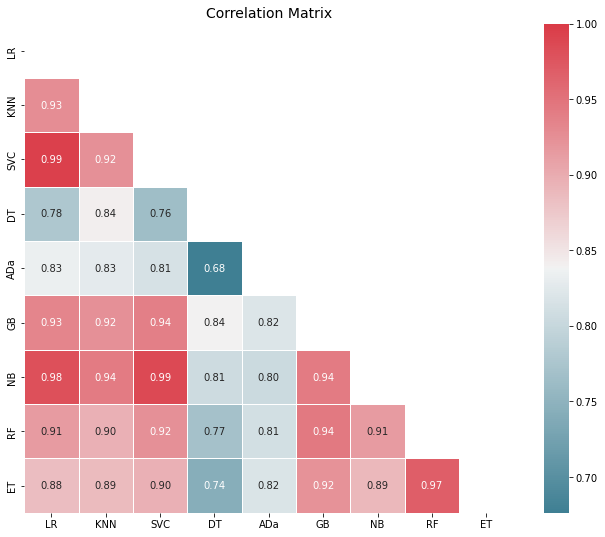

<Axes: title={'center': 'Correlation Matrix'}>

In [147]:
from mlens.visualization import corrmat
corrmat(P.corr(), inflate=False)

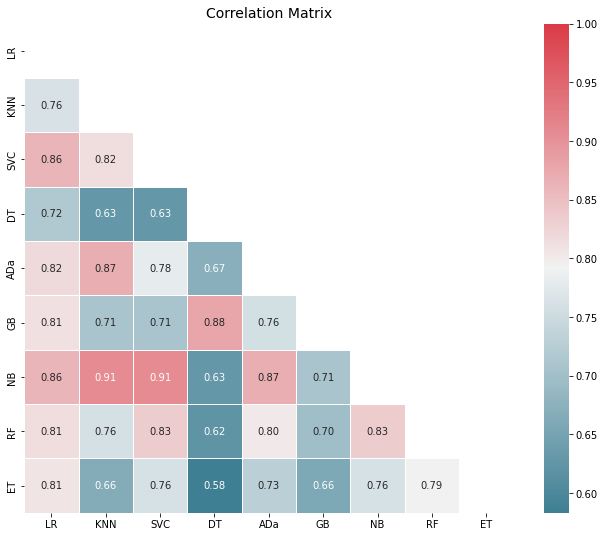

<Axes: title={'center': 'Correlation Matrix'}>

In [149]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc).corr(), inflate=False)

In [150]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

In [155]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train_sc, y_train_sc)

# Predict the test set
p_sl = sl.predict_proba(X_test_sc)

#print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test_sc, p_sl[:, 1]))


Fitting 2 layers
Processing layer-1             done | 00:00:10
Processing layer-2             done | 00:00:03
Fit complete                        | 00:00:15

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:02


In [152]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [153]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test_sc== pp).mean())


Super Learner Accuracy score: 0.85937500
